In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment.

In [234]:
data=pd.read_excel(r'C:\Users\Administrator\Downloads\iris.xls')

In [235]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [236]:
data.shape

(150, 5)

In [237]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Do necessary pre-processing steps.

In [238]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [239]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

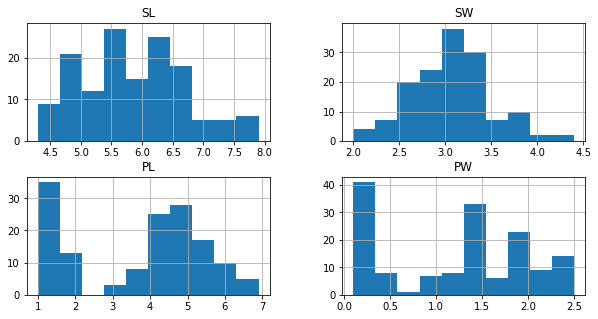

In [240]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))

In [241]:
data['SL'].fillna(data['SL'].mean(),inplace=True)

In [242]:
data['SW'].fillna(data['SW'].mean(),inplace=True)

In [243]:
data['PL'].fillna(data['PL'].mean(),inplace=True)

In [244]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [245]:
data.Classification.nunique()

3

In [246]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [247]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Classification']= label_encoder.fit_transform(data['Classification'])
data['Classification'].unique()

array([0, 1, 2])

In [248]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


# Find out which classification model gives the best result to predict iris species.

LOGISTIC REGRESSION

In [249]:
X=data[['SL','SW','PL','PW']]

In [250]:
y=data['Classification']

In [251]:
X_train.shape

(120, 4)

In [252]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [253]:
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

In [254]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [255]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred,average='macro'))
print('recall',recall_score(y_test,y_pred,average='macro'))
print('f1 score',f1_score(y_test,y_pred,average='macro'))

Accuracy is 1.0
precision 1.0
recall 1.0
f1 score 1.0


In [256]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

KNN

In [259]:
from sklearn.neighbors import KNeighborsClassifier
acc_value=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

In [260]:
acc=accuracy_score(y_test,y_pred)
acc_value.append(acc)

In [261]:
acc_value

[1.0]

In [277]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

SVM

In [262]:
from sklearn.svm import SVC

In [263]:
svm_linear=SVC(kernel='linear')

In [264]:
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)

In [265]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [266]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred,average='macro'))
print('recall',recall_score(y_test,y_pred,average='macro'))
print('f1 score',f1_score(y_test,y_pred,average='macro'))

Accuracy is 1.0
precision 1.0
recall 1.0
f1 score 1.0


DECISSION TREE

In [267]:
from sklearn.tree import DecisionTreeClassifier

In [268]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [269]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [270]:
accuracy_score(y_test,y_pred)

1.0

In [278]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

RANDOM FOREST

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [272]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [273]:
ypred=model.predict(X_test)

In [274]:
ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [275]:
accuracy_score(y_test,ypred)

1.0

In [276]:
confusion_matrix(y_test,ypred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)